In [3]:
pip install pyspark findspark

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Tugas1
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [9]:
#Tugas2
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [10]:
#Tugas tambahan 2.1
spark.sql('''
SELECT AVG(Salary) as AverageSalary, Deptid
FROM employees
GROUP BY Gender, Deptid
ORDER BY Deptid
''').show()

+-------------+------+
|AverageSalary|Deptid|
+-------------+------+
|       2850.0|     1|
|       4100.0|     2|
+-------------+------+



In [11]:
#Tugas tambahan 2.2
spark.sql('''
SELECT Name, Salary 
FROM employees 
WHERE Salary > 2850
GROUP BY Name, Salary
''').show()

+-----+------+
| Name|Salary|
+-----+------+
|James|  3000|
| Anna|  4100|
+-----+------+



In [12]:
#Tugas Tambahan 2.3
spark.sql('''
SELECT Name, DeptId,Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



In [13]:
#Tugas3
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [14]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [15]:
#Tugas5
spark.sql('''
SELECT d.DeptName, AVG(e.Salary) AS RataRataGaji
FROM employees e
JOIN departments d
ON e.DeptId = d.DeptId
Group BY d.DeptName
ORDER BY RataRataGaji DESC
''').show()
spark.sql('''
SELECT Name, DeptId,Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()

+---------+------------+
| DeptName|RataRataGaji|
+---------+------------+
|Marketing|      4100.0|
|       HR|      2850.0|
+---------+------------+

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



In [17]:
#Tugas6
spark.sql('''
SELECT 
    d.DeptName,
    e.Name,
    e.Age,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age 
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW), 2) AS SalaryTrendByAge
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()

+---------+-----+---+------+----------------+
| DeptName| Name|Age|Salary|SalaryTrendByAge|
+---------+-----+---+------+----------------+
|       HR|  Lee| 23|  2700|          2700.0|
|       HR|James| 34|  3000|          2850.0|
|Marketing| Anna| 28|  4100|          4100.0|
+---------+-----+---+------+----------------+



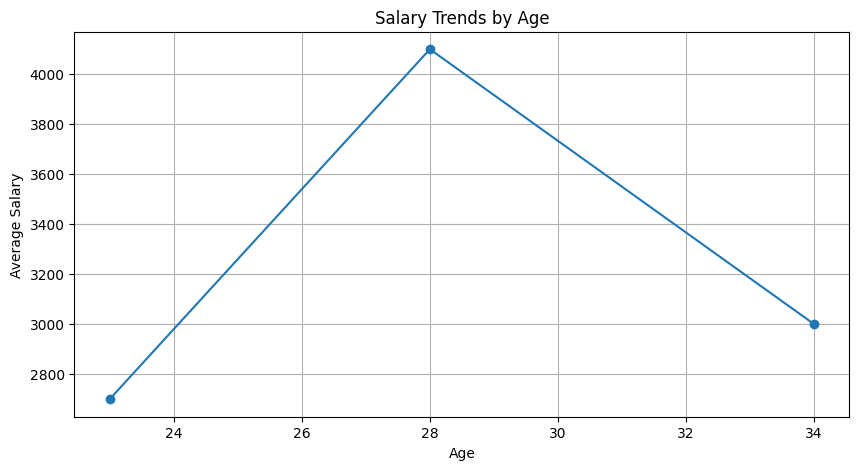

In [18]:
#Tugas7
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

25/12/04 19:15:55 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


    DeptName  TotalSalary  EmployeeCount
0         HR         5700              2
1  Marketing         4100              1


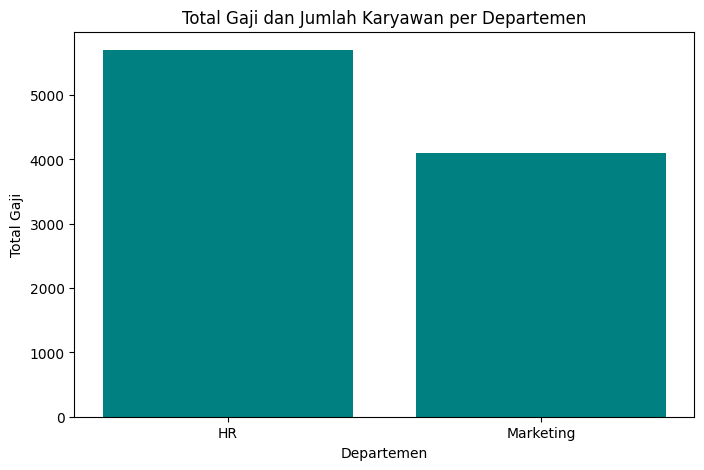

In [21]:
#Homework Tugas1
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Inisialisasi Spark
spark = SparkSession.builder.appName('Homework2.1').getOrCreate()

# Data employees, departments, dan projects
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

dept_salary = spark.sql('''
SELECT d.DeptName, 
       SUM(e.Salary) AS TotalSalary,
       COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''').toPandas()

print(dept_salary)

# Visualisasi
plt.figure(figsize=(8, 5))
plt.bar(dept_salary['DeptName'], dept_salary['TotalSalary'], color='teal', label='TotalSalary')

# Label dan Judul
plt.title('Total Gaji dan Jumlah Karyawan per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')

# Menampilkan grafik
plt.show()

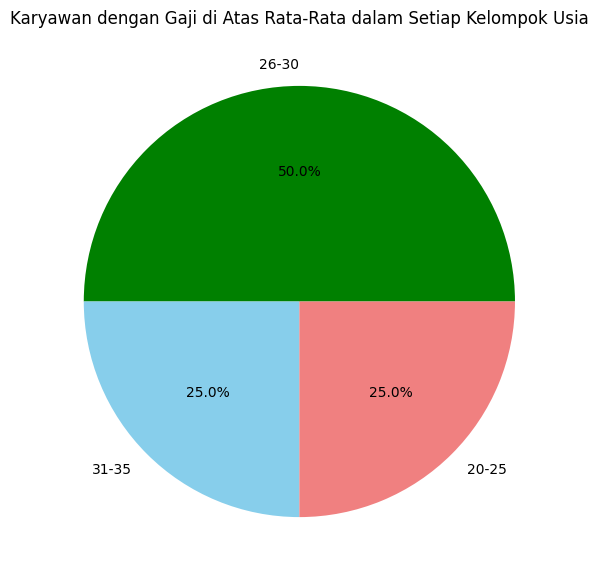

In [28]:
#Homework Tugas2
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('Homework2.2').getOrCreate()

data = [
    ('James', 34, 3000),
    ('Anna', 28, 4100),
    ('Lee', 23, 2700),
    ('Jane', 26, 4700),
    ('Nahmier', 31, 5000),
    ('Trace', 24, 5100),
    ('Travy', 29, 4500)
]
employees = spark.createDataFrame(data, ['Name', 'Age', 'Salary'])
employees.createOrReplaceTempView('employees')

above_avg = spark.sql('''
WITH avg_per_agegroup AS (
  SELECT CASE
           WHEN Age BETWEEN 20 AND 25 THEN '20-25'
           WHEN Age BETWEEN 26 AND 30 THEN '26-30'
           WHEN Age BETWEEN 31 AND 35 THEN '31-35'
           ELSE '51+' END AS AgeGroup,
         AVG(Salary) AS avg_salary
  FROM employees
  GROUP BY AgeGroup
)
SELECT e.Name, e.Age, e.Salary, a.AgeGroup
FROM employees e
JOIN avg_per_agegroup a 
  ON (CASE
        WHEN e.Age BETWEEN 20 AND 25 THEN '20-25'
        WHEN e.Age BETWEEN 26 AND 30 THEN '26-30'
        WHEN e.Age BETWEEN 31 AND 35 THEN '31-35'
        ELSE '51+' END) = a.AgeGroup
WHERE e.Salary > a.avg_salary
''').toPandas()

# Menghitung jumlah per kelompok usia
counts = above_avg['AgeGroup'].value_counts()

# Visualisasi
plt.figure(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
        colors=['green','skyblue','lightcoral'])
plt.title('Karyawan dengan Gaji di Atas Rata-Rata dalam Setiap Kelompok Usia')
plt.show()

In [ ]:
#Homework Tugas3